![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Unsupervised Learning Project Part B
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


# • DOMAIN: Automobile

**• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.The vehicle may be viewed from one of many different angles.**

**• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.**

**• All the features are numeric i.e. geometric features extracted from the silhouette.**

**• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model and compare relative results**

In [1]:
#importing necessary Libraries 

#working with data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report,f1_score

## Scaling
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

## Algo
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support,log_loss,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Loading Data</div>

In [2]:
df = pd.read_csv('vehicle.csv')

In [3]:
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [4]:
#fetch all columns
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [5]:
#checking datatypes of each column
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
#shape of data 
shape_Data = df.shape
print('Data set contains "{x}" number of rows and "{y}" number of columns' .format(x=shape_Data[0],y=shape_Data[1]))

Data set contains "846" number of rows and "19" number of columns


In [7]:
#Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">feature-wise percentage of missing values  and checking for unexpected values</div>

In [8]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
df.isnull().sum() * 100 / len(df)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

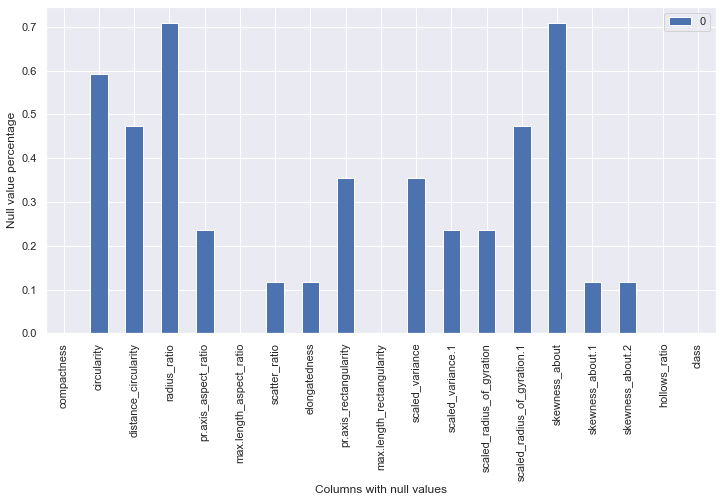

In [10]:
#Null values percentage corresponding to the columns
Percentage_Null = (pd.DataFrame(df.isnull().sum())/len(df))*100
sns.set(rc={'figure.figsize':(12,6)})
Percentage_Null.plot.bar()
plt.xlabel("Columns with null values")
plt.ylabel("Null value percentage");

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Handling the Missing Values</div>

In [11]:
#Replacing the missing values by mean
for i in df.columns[:17]:
    mean_value = df[i].mean()
    df[i] = df[i].fillna(mean_value)

In [12]:
#Again check for missing values
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Visualizing a Pie-chart and printing percentage of values for variable ‘class’</div>

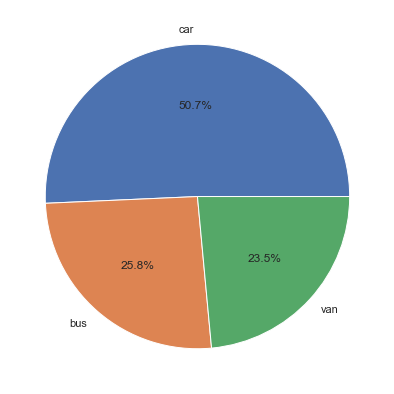

In [13]:
plt.figure(figsize=(17,7))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct='%1.1f%%')
plt.show();

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Checking for Duplicate Rows</div>

In [89]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Variation of Target variable</div>

In [15]:
df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [16]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

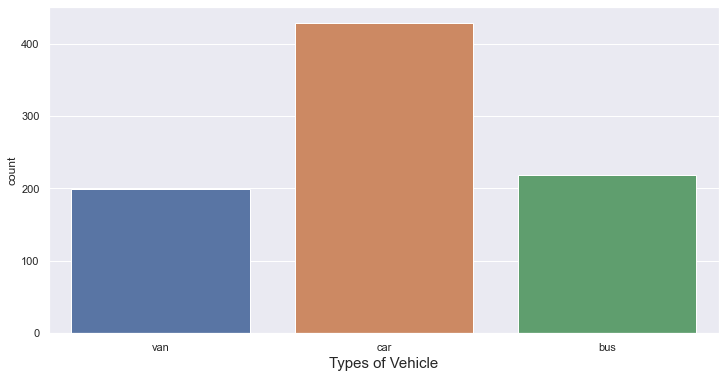

In [17]:
Class = sns.countplot(data = df, x = 'class')
Class.set_xlabel('Types of Vehicle', fontsize=15);

In [18]:
# Label encoder 
from sklearn.preprocessing import LabelEncoder
#Encoding of categorical variable
labelencoder_X=LabelEncoder()
df['class']=labelencoder_X.fit_transform(df['class'])
df['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

Here <br>
1-- Car <br>
0-- Bus <br>
2 -- Van<br>

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Correlation of the dataset attributes</div>

In [19]:
corr=df.corr()
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552,-0.033796
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318,-0.159804
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095,-0.064902
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262,-0.182270
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724,-0.098318
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919,0.207619
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448,-0.288904
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719,0.339348
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191,-0.258479
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770,-0.032399


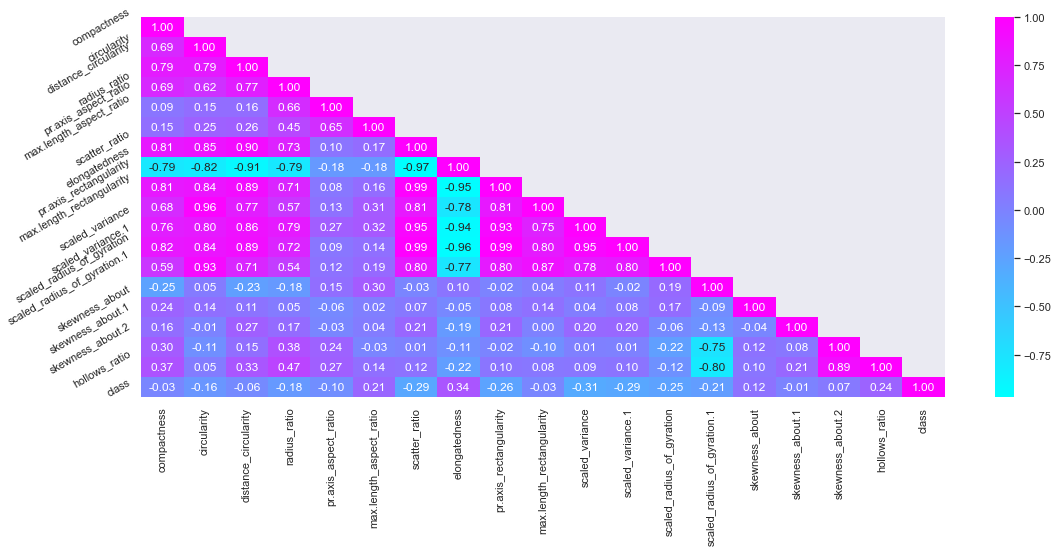

In [20]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f',cmap='cool')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Scaling and spliting Data</div>

In [33]:
#Splitting the data between independent and dependent variables
X=df.iloc[:,0:18]
y = df['class']

In [34]:
#dropping correlated values which are have either more then 85% or less then -85%
X_new=X.drop(['circularity','scatter_ratio','scaled_variance'],axis=1)

In [35]:
#since there is lots of variety in the units of features let's scale it
scaler=StandardScaler().fit(X_new)
X_scaled=scaler.transform(X_new)

In [36]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.3, random_state = 10)

In [37]:
#checking the dimensions of the train and test set
print(X_train.shape) # shape of train data
print(X_test.shape) # shape of test data

(592, 15)
(254, 15)


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Support Vector Classifier</div>

In [38]:
from sklearn.svm import SVC
svclassifier = SVC(gamma=0.05, C=3,random_state=0) 
svclassifier.fit(X_train, y_train) # To train the algorithm on training data


SVC(C=3, gamma=0.05, random_state=0)

In [39]:
y_prediction = svclassifier.predict(X_test) #To make predictions

In [40]:
#check the accuracy on the training data
print('Accuracy on Training data: ',svclassifier.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', svclassifier.score(X_test , y_test))

Accuracy on Training data:  0.9847972972972973
Accuracy on Testing data:  0.9763779527559056


Confusion Matrix:
 [[ 69   0   0]
 [  0 121   0]
 [  2   4  58]]


<AxesSubplot:>

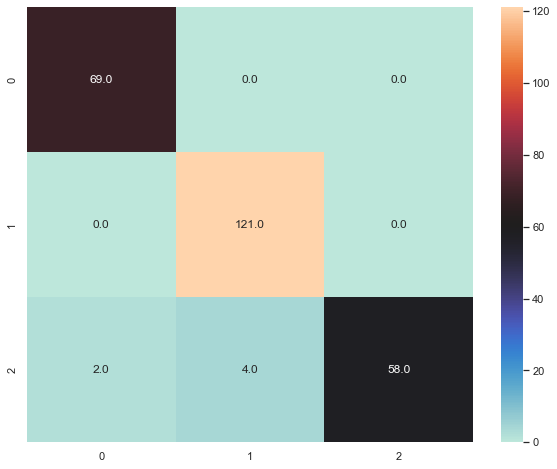

In [81]:
#measure the accuracy of this model's prediction
print("Confusion Matrix:\n",metrics.confusion_matrix(y_prediction,y_test))
cfm_SVC = confusion_matrix(y_prediction, y_test)
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'icefire', fmt = '.1f')

In [42]:
#Evaluate Model Score
print("Classification Report:\n",metrics.classification_report(y_test,y_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       1.00      0.97      0.98       125
           2       0.91      1.00      0.95        58

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



In [43]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('SVM before PCA', SVC(gamma=0.05, C=3)))

# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

Name = SVM before PCA , Mean Accuracy = 0.964492, SD Accuracy = 0.014124


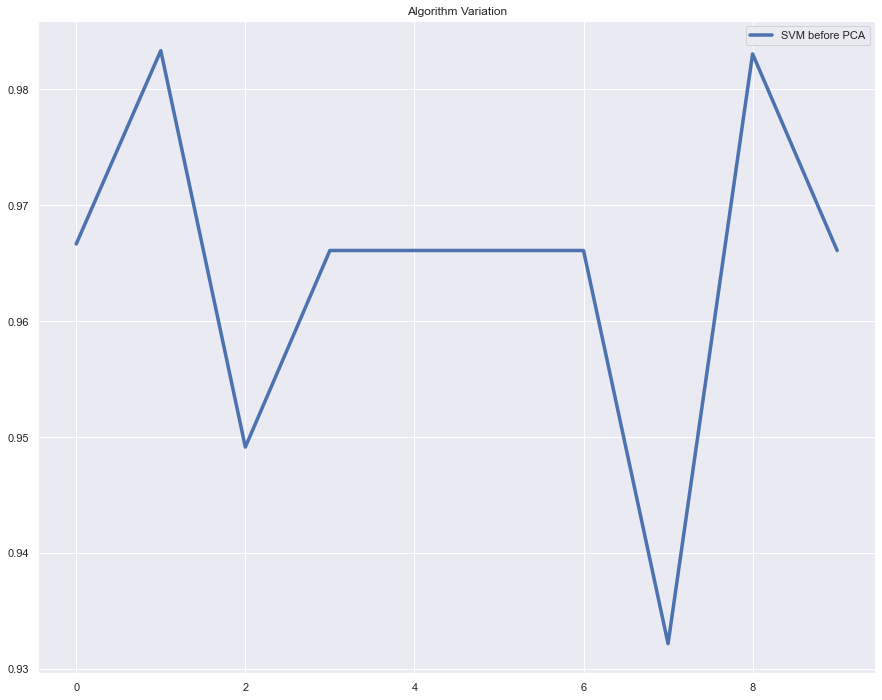

In [46]:
plt.figure(figsize=(15,12))
plt.title('Algorithm Variation')
plt.plot(results[0],label='SVM before PCA')
plt.legend()

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Applying PCA and Extaracting Components with 90%variance Coverage</div>

In [47]:
#Scaling with all Columns(leaving Target)
scaler=StandardScaler().fit(X)
X_scaled_PCA=scaler.transform(X)

In [48]:
#printing Covariance Matrix
covMatrix = np.cov(X_scaled_PCA,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [49]:
#choosing n_component as 10 
pca = PCA(n_components=10)
pca.fit(X_scaled_PCA)

PCA(n_components=10)

In [50]:
#eigen values
print(pca.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [51]:
#eigen Vectors
print(pca.components_[0])

[ 0.27525946  0.29339234  0.30455645  0.26759321  0.0804939   0.09721986
  0.31687201 -0.31404236  0.31395301  0.28279042  0.30931053  0.31414903
  0.27200252 -0.02091798  0.04133167  0.05833316  0.03015605  0.07408137]


In [52]:
#percentage of variance explained by each vector
print(pca.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


Text(0.5, 0, 'eigen Value')

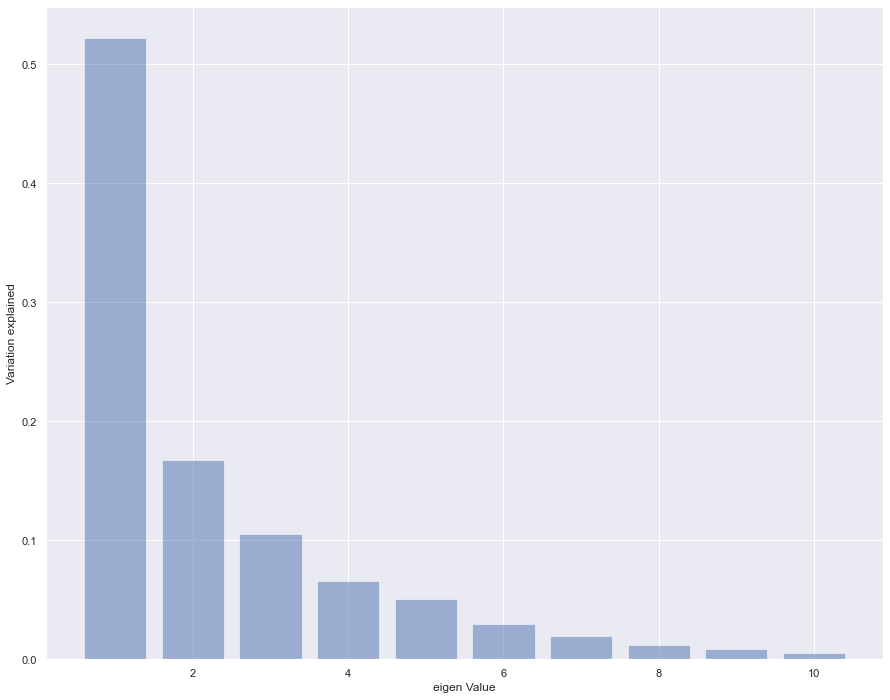

In [53]:
#visualising it
plt.figure(figsize=(15,12))
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">horizontal line on the below plot to highlight the threshold of 90%</div>

Text(0.5, 0, 'eigen Value')

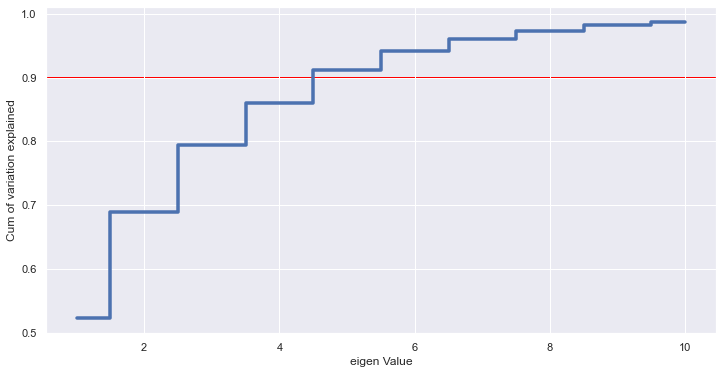

In [82]:
#cummilative variance explained via each vector
fig, (ax1) = plt.subplots(1)
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
ax1.axhline(y=0.9, xmin=0, xmax=3, c="red", linewidth=2, zorder=0)
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')

#### We can conclude that if we take 7 Components we will be covering more than 95% of variance

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Repeating SVM Algorithm with PCA(7 components) to see the Efficiency</div>

In [65]:
#transforming and storing result in X_Train_PCA
pca_model_test = PCA(n_components=7)
pca_model_test.fit(X_scaled_PCA)
X_PCA= pca_model_test.transform(X_scaled_PCA)
X_PCA[0]

array([ 0.3323932 , -0.21863838,  1.00128619,  0.17732785,  0.07910624,
       -0.75481358, -0.90218666])

In [67]:
# Split X and y into training and test set in 70:30 ratio
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,y, test_size = 0.3, random_state = 10)

In [68]:
#model Building
svclassifier_PCA = SVC(gamma=0.05, C=3,random_state=0) 
svclassifier_PCA.fit(X_train_PCA,y_train_PCA)

SVC(C=3, gamma=0.05, random_state=0)

In [69]:
#To make predictions
y_prediction_PCA = svclassifier_PCA.predict(X_test_PCA) 

In [70]:
#check the accuracy on the training data
print('Accuracy on Training data after PCA: ',svclassifier_PCA.score(X_train_PCA, y_train_PCA))
#check the accuracy on the test data
print('Accuracy on Training data after PCA: ',svclassifier_PCA.score(X_test_PCA, y_test_PCA))

Accuracy on Training data after PCA:  0.9594594594594594
Accuracy on Training data after PCA:  0.9133858267716536


Confusion Matrix:
 [[ 63   1   1]
 [  5 116   4]
 [  3   8  53]]


<AxesSubplot:>

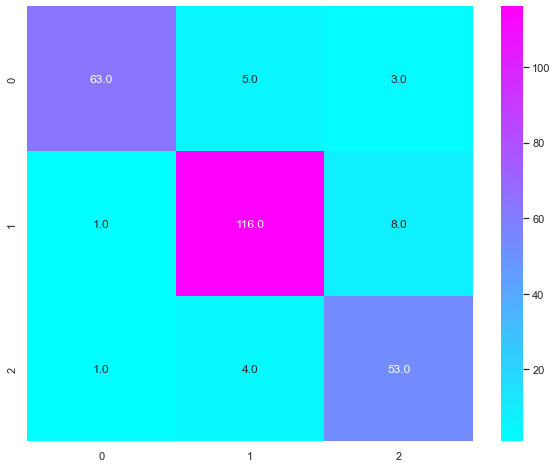

In [79]:
#measure the accuracy of this model's prediction
print("Confusion Matrix:\n",metrics.confusion_matrix(y_prediction_PCA,y_test_PCA))
cfm_SVC = confusion_matrix(y_test_PCA, y_prediction_PCA)
plt.figure(figsize = (10, 8))
sns.heatmap(cfm_SVC, annot = True, cmap = 'cool', fmt = '.1f')

In [83]:
#Evaluate Model Score
print("Classification Report:\n",metrics.classification_report(y_test_PCA,y_prediction_PCA))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        71
           1       0.93      0.93      0.93       125
           2       0.83      0.91      0.87        58

    accuracy                           0.91       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.91      0.91       254



> **from above obervations it is clear that after reducing dimensions through PCA we are still gettting accuracy of 91%**


In [85]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('SVM After PCA', SVC(gamma=0.05, C=3)))

# evaluate each model
results_PCA = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101,shuffle=True)
	cv_results_PCA = model_selection.cross_val_score(model, X_train_PCA, y_train_PCA, cv=kfold, scoring=scoring)
	results_PCA.append(cv_results_PCA)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results_PCA.mean(), cv_results_PCA.std()))

Name = SVM After PCA , Mean Accuracy = 0.928955, SD Accuracy = 0.029293


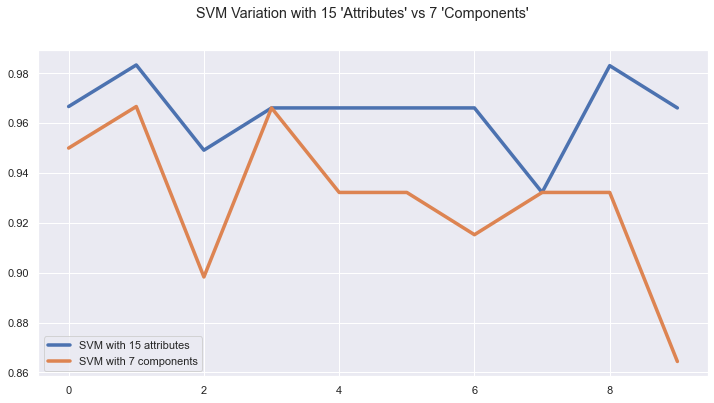

In [86]:
fig = plt.figure()
fig.suptitle("SVM Variation with 15 'Attributes' vs 7 'Components'")
ax = fig.add_subplot(111)
plt.plot(results[0],label='SVM with 15 attributes')
plt.plot(results_PCA[0],label='SVM with 7 components')
plt.legend()

In [87]:
Accuracy_df=pd.DataFrame([{'Model':'SVM with 15 attribute','Mean Accuracy': cv_results.mean(),'Standard Deviation':cv_results.std()},
                       {'Model':'SVM with 7 Components','Mean Accuracy':cv_results_PCA.mean(),'Standard Deviation':cv_results_PCA.std()}
                       ] ) 
Accuracy_df=Accuracy_df[['Model','Mean Accuracy','Standard Deviation']]
Accuracy_df


,Model,Mean Accuracy,Standard Deviation
0,SVM with 15 attribute,0.964492,0.014124
1,SVM with 7 Components,0.928955,0.029293


# Conclusion
1. This study of Algorithm variation over the dimension reduction techniques shows how benificial it might get.
2. From the above DataFrame we can see that with the Raw data that was intially provided to us having 18columns i.e. 17 attributes gives accuracy of (93-99)% over SVM.
3. If we Build a PCA and reduce dimension from 17 to 7, that is we are almost droping 10 dimensions yet the accuracy is (89-95)%
4. From this behaviour we can conclude how efficient is our PCA, it made our Algo more reliable, Fast and ready for production.

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">pre-requisite/assumptions of PCA</div>

**Pre-requisites of using PCA**

* Whenever we want to ensure that variables in data are independent to each other.
* When we want to reduce the number of variables in a data set with many variables in it.
* When we want to interpret data and variable selection out of it.
* Data needs to be standardized before implementing PCA else it becomes difficult to identify optimal principal components.

**Assumptions of PCA**

* Independent variables are highly correlated to each other.
* There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.
* Variables included are metric level or nominal level.
* Features are low dimensional in nature.
* Independent variables are numeric in nature.
* PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise. Pearson correlation coefficient framework led to the origin of PCA, and there it was assumed first that the axes with high variance would only be turned into principal components.

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Explain advantages and limitations of PCA.</div>

**Advantages**

* PCA is a widely used technique for decreasing the dimensions of a feature set.
* PCA can be used as a data reduction technique as it allows us to find the most important variables that are needed to describe a dataset. 
* PCA can also be used to reduce the dimensionality of the data space in order to get insight on the inner structure of the data. This is helpful when dealing with large datasets.
* Principal components are independent of each other, so removes correlated features.
* PCA improves the performance of the ML algorithm as it eliminates correlated variables that don't contribute in any decision making.
* PCA helps in overcoming data overfitting issues by decreasing the number of features.
* PCA results in high variance and thus improves visualization.
* Reduction of noise since the maximum variation basis is chosen and so the small variations in the background are ignored automatically.


**Limitations**

* PCA effectiveness depends upon the scales of the attributes. If attributes have different scales, PCA will pick variable with highest variance rather than picking up attributes based on correlation
* Changing scales of the variables can change the PCA
* Interpreting PCA can become challenging due to presence of discrete data
* Presence of skew in data with long thick tail can impact the effectiveness of the PCA
* PCA assumes linear relationship between attributes. It is ineffective when relationships are non linear
* PCA can also lead to low model performance after applying it if the original dataset has a weak correlation or no correlation. The variables need to be related to one other to apply PCA perfectly.
* It is not suitable for small data sets 
*  It does not find the important factors but selects them based on the values. So, it is difficult to find the important factors.
* It does not have a strong mathematical structure behind it.
* It cannot find any non-linear relationships.

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)